In [1]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [108]:
from importlib import reload
import pytorch_model
reload(pytorch_model)
from pytorch_model import Bowzer, evaluate

In [101]:
bowzer = Bowzer(resize_n=32)

In [102]:
image, shape = next(iter(bowzer.dataloader_train))
print(image.shape)#, image.squeeze().permute(1,2,0))

torch.Size([37, 3, 32, 32])


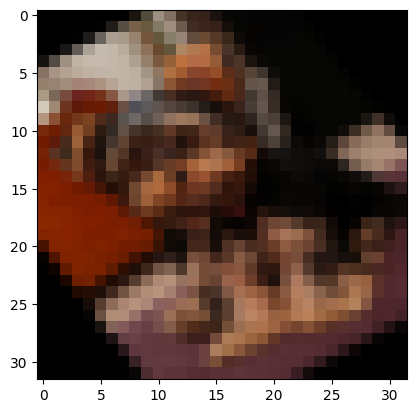

In [103]:
bowzer.show_img(bowzer.train_data._images[-1].as_posix(), bowzer.train_transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.026984438..1.0000002].


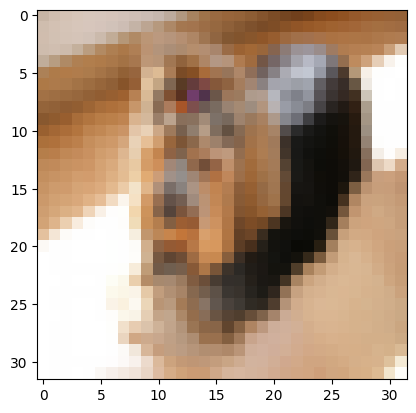

In [104]:
bowzer.show_img(bowzer.test_data._images[-1].as_posix(), bowzer.test_transforms)

In [106]:
bowzer.train()

Epoch 1, Loss: 3.5052
Epoch 2, Loss: 3.2676
Epoch 3, Loss: 3.1416


In [107]:
bowzer.net.state_dict()

OrderedDict([('feature_extractor.0.weight',
              tensor([[[[-0.1670, -0.1575, -0.1363],
                        [-0.0050,  0.1769, -0.1391],
                        [ 0.0904, -0.1123, -0.1921]],
              
                       [[-0.0484,  0.1126,  0.1797],
                        [-0.1269,  0.0478,  0.1696],
                        [ 0.1355,  0.1314,  0.1451]],
              
                       [[ 0.1126,  0.0472, -0.1361],
                        [-0.1697, -0.0863, -0.0251],
                        [-0.1115,  0.0806,  0.0632]]],
              
              
                      [[[-0.0078,  0.1110,  0.0993],
                        [ 0.1573,  0.1693, -0.0256],
                        [ 0.2279,  0.0176,  0.0308]],
              
                       [[-0.1807, -0.1230, -0.1094],
                        [-0.0755,  0.1436, -0.0555],
                        [-0.1344,  0.0853,  0.0736]],
              
                       [[ 0.1022, -0.1252,  0.0229],
            

In [99]:
bowzer.test_data.class_to_idx

{'Abyssinian': 0,
 'American Bulldog': 1,
 'American Pit Bull Terrier': 2,
 'Basset Hound': 3,
 'Beagle': 4,
 'Bengal': 5,
 'Birman': 6,
 'Bombay': 7,
 'Boxer': 8,
 'British Shorthair': 9,
 'Chihuahua': 10,
 'Egyptian Mau': 11,
 'English Cocker Spaniel': 12,
 'English Setter': 13,
 'German Shorthaired': 14,
 'Great Pyrenees': 15,
 'Havanese': 16,
 'Japanese Chin': 17,
 'Keeshond': 18,
 'Leonberger': 19,
 'Maine Coon': 20,
 'Miniature Pinscher': 21,
 'Newfoundland': 22,
 'Persian': 23,
 'Pomeranian': 24,
 'Pug': 25,
 'Ragdoll': 26,
 'Russian Blue': 27,
 'Saint Bernard': 28,
 'Samoyed': 29,
 'Scottish Terrier': 30,
 'Shiba Inu': 31,
 'Siamese': 32,
 'Sphynx': 33,
 'Staffordshire Bull Terrier': 34,
 'Wheaten Terrier': 35,
 'Yorkshire Terrier': 36}

In [111]:
precision, recall = evaluate(
        model = bowzer.net,
        num_classes=bowzer.num_classes,
        dataloader_test=bowzer.dataloader_test,
        average = 'macro'
        )

Precision: 0.12754447758197784
Recall: 0.13351106643676758


In [112]:
precision_by_class, recall_by_class = evaluate(
        model = bowzer.net,
        num_classes=bowzer.num_classes,
        dataloader_test=bowzer.dataloader_test,
        average = None
        )

Precision: tensor([0.0838, 0.2182, 0.0000, 0.1596, 0.1807, 0.0857, 0.2500, 0.2294, 0.0833,
        0.1429, 0.1000, 0.1837, 0.0000, 0.0000, 0.0905, 0.1346, 0.1509, 0.1140,
        0.1429, 0.0966, 0.0000, 0.0800, 0.1758, 0.1023, 0.1875, 0.2381, 0.0968,
        0.1452, 0.1341, 0.2247, 0.0784, 0.0732, 0.1800, 0.1467, 0.0625, 0.2222,
        0.1250])
Recall: tensor([0.3163, 0.1200, 0.0000, 0.1500, 0.1500, 0.0300, 0.0300, 0.6023, 0.0101,
        0.0800, 0.0300, 0.0928, 0.0000, 0.0000, 0.1800, 0.0700, 0.2400, 0.3900,
        0.0606, 0.1700, 0.0000, 0.1200, 0.4500, 0.0900, 0.0300, 0.0500, 0.1800,
        0.2700, 0.2400, 0.4000, 0.0404, 0.0300, 0.0900, 0.1100, 0.0674, 0.0200,
        0.0300])


In [115]:
{k: precision_by_class[v].item() for k, v in bowzer.test_data.class_to_idx.items()}

{'Abyssinian': 0.08378378301858902,
 'American Bulldog': 0.2181818187236786,
 'American Pit Bull Terrier': 0.0,
 'Basset Hound': 0.1595744639635086,
 'Beagle': 0.1807228922843933,
 'Bengal': 0.08571428805589676,
 'Birman': 0.25,
 'Bombay': 0.2294372320175171,
 'Boxer': 0.0833333358168602,
 'British Shorthair': 0.1428571492433548,
 'Chihuahua': 0.10000000149011612,
 'Egyptian Mau': 0.18367347121238708,
 'English Cocker Spaniel': 0.0,
 'English Setter': 0.0,
 'German Shorthaired': 0.09045226126909256,
 'Great Pyrenees': 0.13461539149284363,
 'Havanese': 0.15094339847564697,
 'Japanese Chin': 0.11403508484363556,
 'Keeshond': 0.1428571492433548,
 'Leonberger': 0.09659090638160706,
 'Maine Coon': 0.0,
 'Miniature Pinscher': 0.07999999821186066,
 'Newfoundland': 0.17578125,
 'Persian': 0.10227272659540176,
 'Pomeranian': 0.1875,
 'Pug': 0.2380952388048172,
 'Ragdoll': 0.09677419066429138,
 'Russian Blue': 0.14516128599643707,
 'Saint Bernard': 0.1340782195329666,
 'Samoyed': 0.2247191071510

In [118]:
{k: recall_by_class[v].item() for k, v in bowzer.test_data.class_to_idx.items()}

{'Abyssinian': 0.3163265287876129,
 'American Bulldog': 0.11999999731779099,
 'American Pit Bull Terrier': 0.0,
 'Basset Hound': 0.15000000596046448,
 'Beagle': 0.15000000596046448,
 'Bengal': 0.029999999329447746,
 'Birman': 0.029999999329447746,
 'Bombay': 0.6022727489471436,
 'Boxer': 0.010101010091602802,
 'British Shorthair': 0.07999999821186066,
 'Chihuahua': 0.029999999329447746,
 'Egyptian Mau': 0.09278350323438644,
 'English Cocker Spaniel': 0.0,
 'English Setter': 0.0,
 'German Shorthaired': 0.18000000715255737,
 'Great Pyrenees': 0.07000000029802322,
 'Havanese': 0.23999999463558197,
 'Japanese Chin': 0.38999998569488525,
 'Keeshond': 0.06060606241226196,
 'Leonberger': 0.17000000178813934,
 'Maine Coon': 0.0,
 'Miniature Pinscher': 0.11999999731779099,
 'Newfoundland': 0.44999998807907104,
 'Persian': 0.09000000357627869,
 'Pomeranian': 0.029999999329447746,
 'Pug': 0.05000000074505806,
 'Ragdoll': 0.18000000715255737,
 'Russian Blue': 0.27000001072883606,
 'Saint Bernard':

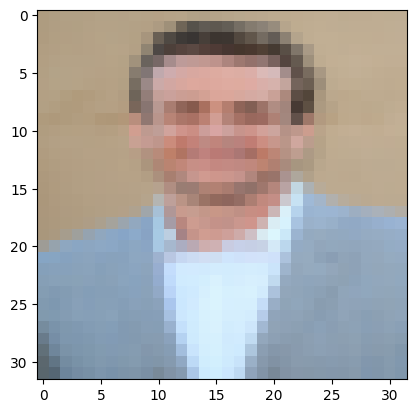

In [119]:
# Load and transform image
#jason_segel = Image.open("/Users/kristinaqualben/Downloads/jason-segel.jpeg")
jason_segel = "/Users/kristinaqualben/Downloads/jason-segel.jpeg"
bowzer.show_img(jason_segel, bowzer.test_transforms)

In [127]:
from PIL import Image
import torch
jason_segel = "/Users/kristinaqualben/Downloads/jason-segel.jpeg"
pred_image = Image.open(jason_segel)
pred_image_tensor = bowzer.test_transforms(pred_image)
pred_image_tensor_reshaped = pred_image_tensor.unsqueeze(0)

bowzer.net.eval()
with torch.no_grad():
    pred = bowzer.net(pred_image_tensor_reshaped).squeeze(0)
pred_cls = pred.softmax(0)
cls_id = pred_cls.argmax().item()


In [149]:
import pandas as pd
dog_matches = {k: pred_cls.data[v].item() for k, v in bowzer.test_data.class_to_idx.items()}
pred_df = pd.DataFrame(dog_matches.items(), columns = ['dog','probability']).sort_values(by = 'probability', ascending=False).reset_index(drop=True)
pred_df

,dog,probability
0,Pomeranian,0.107790
1,Chihuahua,0.106921
2,Ragdoll,0.083740
3,Beagle,0.081262
4,Persian,0.061750
5,Shiba Inu,0.057470
6,Japanese Chin,0.043774
7,Saint Bernard,0.042764
8,Yorkshire Terrier,0.034854
9,Samoyed,0.033671
